# **COMP9444 Project**

### **Garbage Classification**

**Team Rabbit**

**z5449068 Tianwen Qin**

**z5437652 Weichong Huang**

**z5471857 Qiuli Jin**

**z5365195 Yuhao Ke**

**z5391857 Caiwei Liu**

## Introduction, Motivation & Problem Statement

With the development of cities and the increasingly serious environmental issues, the issue of garbage classification has become increasingly important. The precise classification of garbage can solve many problems, such as reducing pollution and resource recycling and reuse. However, due to the increasing diversity of garbage and labor costs nowadays, precise classification of garbage is a challenge, both in terms of accuracy and efficiency. We want to propose a solution that can utilize some deep learning model to accurately identify and classify some garbage images. This technology can be applied to urban waste treatment plants to accurately and automatically classify recycled waste. To address the issues of insufficient classification accuracy and low efficiency.

To complete this task, we plan to use four deep learning models, namely MobileNetV2, DenseNet, Vgg19, and ResNet. And compare their effects.

## Data Sources

This dataset is collected from the network. You can click on the link https://github.com/Jarvan39/9444Garbage-data-set to find and download it. The Garbage Classification Dataset contains 6 classifications: cardboard (393), glass (491), metal (400), paper(584), plastic (472) and trash(127). Trash means non recyclable garbage. All images are in jpg format. We will use Google Colab for model training, with a computing power core of V100

Firstly, we need to upload the downloaded dataset to the Colab workflow.

In [ ]:
!unzip /content/archive.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard161.jpg  
  infl

Next, we will import some library functions to support our future work.

In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

## Method1: MobileNetV2

MobileNetV2 (Mobile Network Version 2) is a lightweight convolutional neural network architecture designed specifically for computer vision tasks such as image classification, object detection, and semantic segmentation on resource constrained mobile devices. MobileNetV2 can meet real-time performance requirements on mobile devices.
MobileNetV2 is a further improved version of MobileNet, which adopts some new technologies and architectural designs to improve the performance and efficiency of the model.
MobileNetV2 has become a common choice for computer vision tasks on mobile devices, providing an excellent balance between speed and performance. It is widely used in mobile applications, smart phones, embedded systems, Internet of Things devices, autonomous vehicle and other fields. Due to its lightweight and efficient performance, MobileNetV2 is highly valuable for applications that require running deep learning models in resource constrained environments.
The reason we chose MobileNetV2 is to apply our solution in embedded system environments such as factories. Technical reference: https://www.mathworks.com/help/deeplearning/ref/mobilenetv2.html

Check if the dataset has been imported correctly and visualize some dataset images.

In [ ]:
d = '/content/Garbage classification/Garbage classification'

classes = os.listdir(d)
print(classes)

['cardboard', 'glass', 'trash', 'paper', 'plastic', 'metal']


Label: cardboard (Class No: 0)


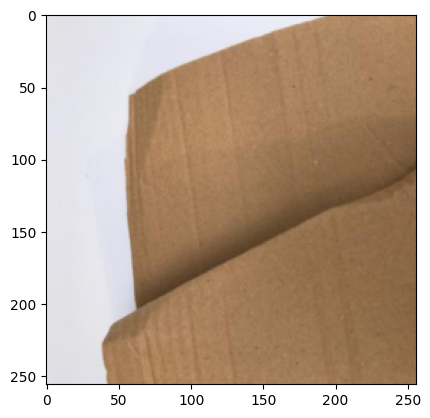

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

dataset = ImageFolder(d, transform = transformations)


import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

img, label = dataset[11]
show_sample(img, label)


Label: glass (Class No: 1)


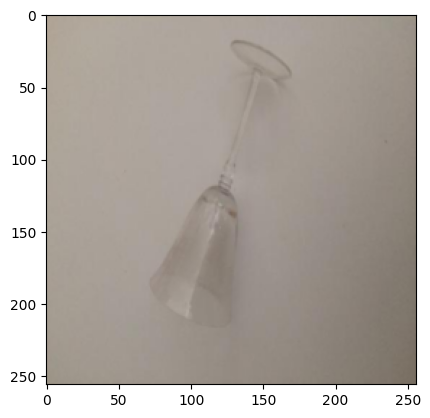

In [ ]:
img, label = dataset[510]
show_sample(img, label)

## MobileNetV2(Without Data Preprocessing)



Without normalization: The pixel value range of the image will remain at its original value, usually between 0 and 255.

Do not use data augmentation: ImageDataGenerator and related data augmentation operations

In [ ]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])


data=np.array(data)
import random
random.shuffle(data)

X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)


x=np.array(X)
y=np.array(Y)

print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


<ipython-input-66-41d486aa4a10>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)

X_train = x_train / 255.0
X_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


### create MobileNetV2 Model

In [ ]:
m = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

m.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_9[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

### Start training

In [ ]:
from tensorflow.keras.optimizers import SGD

base_input = m.layers[0].input
base_output = m.layers[-2].output

final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dropout(0.5)(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

new_model = tf.keras.Model(inputs=base_input, outputs=final_output)
sgd_optimizer = SGD(learning_rate=0.001)

new_model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd_optimizer, metrics=["accuracy"])
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = new_model.fit(
    x_train, y_train, batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
48/48 [==============================] - 16s 83ms/step - loss: 1.0947 - accuracy: 0.6194 - val_loss: 1.2927 - val_accuracy: 0.5203
Epoch 2/10
48/48 [==============================] - 3s 58ms/step - loss: 0.5853 - accuracy: 0.8173 - val_loss: 1.2577 - val_accuracy: 0.5223
Epoch 3/10
48/48 [==============================] - 3s 58ms/step - loss: 0.3830 - accuracy: 0.8766 - val_loss: 1.2213 - val_accuracy: 0.5302
Epoch 4/10
48/48 [==============================] - 3s 58ms/step - loss: 0.2814 - accuracy: 0.9116 - val_loss: 1.0364 - val_accuracy: 0.6251
Epoch 5/10
48/48 [==============================] - 3s 58ms/step - loss: 0.1964 - accuracy: 0.9466 - val_loss: 1.1847 - val_accuracy: 0.5767
Epoch 6/10
48/48 [==============================] - 3s 59ms/step - loss: 0.1546 - accuracy: 0.9571 - val_loss: 1.2399 - val_accuracy: 0.5767
Epoch 7/10
48/48 [==============================] - 3s 58ms/step - loss: 0.1197 - accuracy: 0.9664 - val_loss: 0.9756 - val_accuracy: 0.6894
Epoch 8/10
4

### Results & Evaluate the model

In [ ]:
new_model.evaluate(x_test,y_test)

32/32 [==============================] - 1s 17ms/step - loss: 0.6153 - accuracy: 0.8140


[0.6153414249420166, 0.8140454888343811]

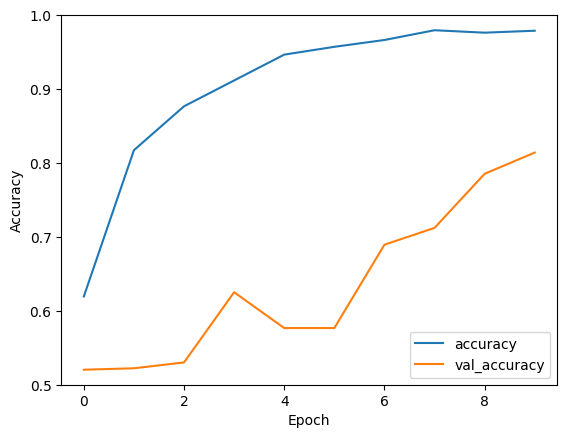

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

32/32 [==============================] - 1s 15ms/step


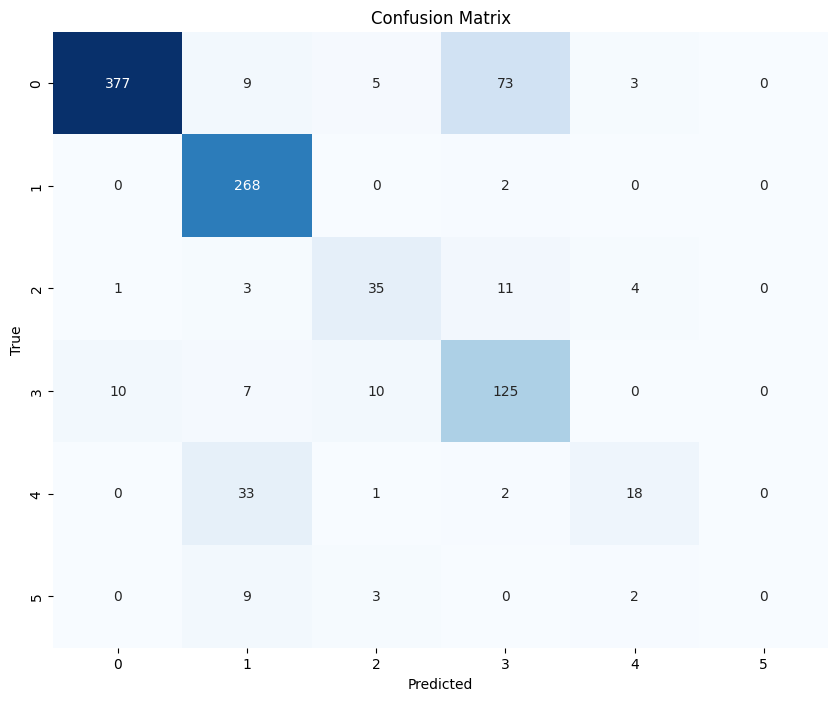

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = new_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


confusion_mtx = confusion_matrix(y_test, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



## MobileNetV2(With Data preprocessing)

### Analysis of Data and Preprocessing

Load image data and assign corresponding labels to each image.

In [ ]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])


data=np.array(data)
import random
random.shuffle(data)

X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)


x=np.array(X)
y=np.array(Y)

print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


<ipython-input-73-41d486aa4a10>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


The data was divided into training and testing sets, and normalized.
Allocate 40% of the dataset to the test set, while the remaining 60% is allocated to the training set. Divide the image data by 255.0 and scale the pixel values to between 0 and 1. Helps the model learn faster.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)

X_train = x_train / 255.0
X_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


We have created a data augmentation generator, datagen, to enhance image data during the training process. Data augmentation is a technique that increases sample diversity by randomly transforming training images, which helps to improve the model's generalization ability.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Create MobileNetV2 model

In [ ]:
m = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

m.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_10[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

A new improved model was created by adding some fully connected layers to the output of the pre trained MobileNetV2 model and compiling the model for training.

Added some new layers to build custom heads. This includes two fully connected layers (Dense layer), one ReLU activation layer, and one discard layer. The last layer is a fully connected layer with softmax activation function, used for multi class classification problems. These layers will handle the output of the MobileNetV2 model and create appropriate outputs.
Use an SGD optimizer with a learning rate set to 0.001. Train the model using data augmentation techniques` Datagen. flow 'generates batches that have been enhanced with data, and then uses these batches for training` Steps_ Per_ Epoch 'is set to calculate the number of steps based on the batch size. The training frequency is 10 rounds.

### Start training

In [ ]:
base_input = m.layers[0].input
base_output = m.layers[-2].output


final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dropout(0.5)(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

new_model = tf.keras.Model(inputs=base_input, outputs=final_output)
sgd_optimizer = SGD(learning_rate=0.001)

new_model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd_optimizer, metrics=["accuracy"])
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])


history = new_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
47/47 [==============================] - 28s 351ms/step - loss: 0.7871 - accuracy: 0.7586 - val_loss: 0.7659 - val_accuracy: 0.7903
Epoch 2/10
47/47 [==============================] - 16s 338ms/step - loss: 0.3489 - accuracy: 0.8938 - val_loss: 0.7399 - val_accuracy: 0.7646
Epoch 3/10
47/47 [==============================] - 16s 338ms/step - loss: 0.2633 - accuracy: 0.9294 - val_loss: 0.6934 - val_accuracy: 0.7953
Epoch 4/10
47/47 [==============================] - 16s 340ms/step - loss: 0.2152 - accuracy: 0.9354 - val_loss: 0.4704 - val_accuracy: 0.8665
Epoch 5/10
47/47 [==============================] - 16s 340ms/step - loss: 0.2042 - accuracy: 0.9426 - val_loss: 0.6607 - val_accuracy: 0.8269
Epoch 6/10
47/47 [==============================] - 16s 340ms/step - loss: 0.1701 - accuracy: 0.9485 - val_loss: 0.6739 - val_accuracy: 0.8190
Epoch 7/10
47/47 [==============================] - 16s 343ms/step - loss: 0.1435 - accuracy: 0.9505 - val_loss: 0.7970 - val_accuracy: 0.8121

### Results & Evaluate the model

In [ ]:
new_model.evaluate(x_test,y_test)

32/32 [==============================] - 1s 17ms/step - loss: 0.3924 - accuracy: 0.8981


[0.39236167073249817, 0.8981207013130188]

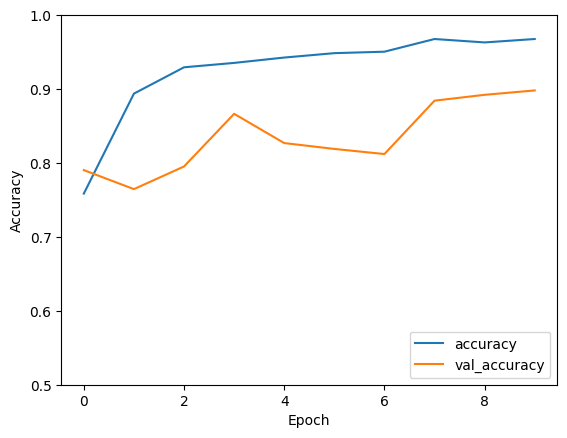

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

32/32 [==============================] - 1s 14ms/step


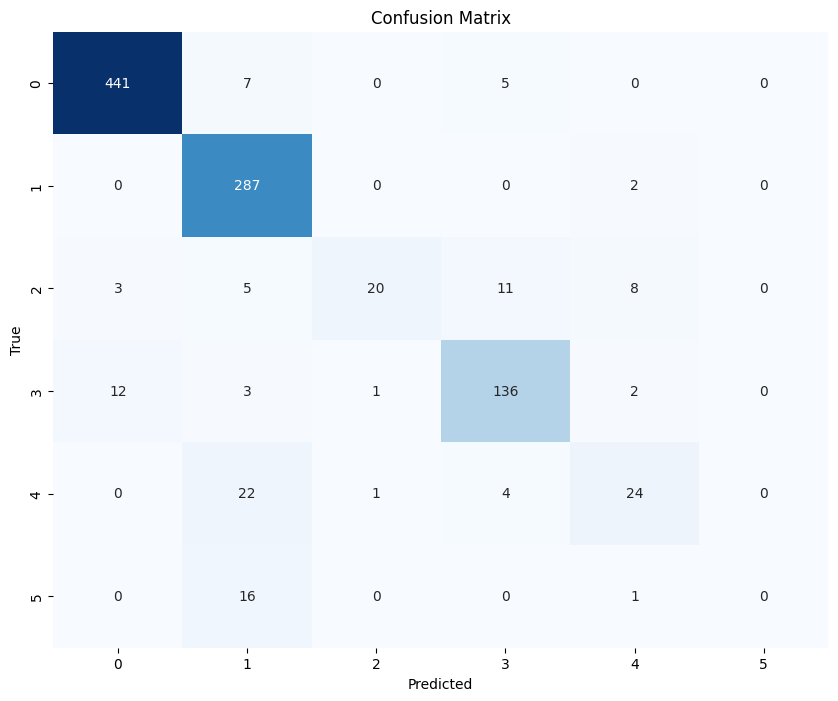

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = new_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


confusion_mtx = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Discussion

We can see that the accuracy performance of the model on the training set is good, approaching 98%, but the accuracy performance on the validation set is not as good. Only about 90%. Although this result is within an acceptable range. We infer that overfitting may have occurred. The model learned about the noise and specific samples in the training set, but cannot generalize to new data. To solve this problem, we need to reduce the complexity of the model, increase training data, and apply regularization techniques to alleviate it. Another reason may be that the overall dataset size is too small, resulting in insufficient verification set size for partitioning. If the sample size of the validation set is relatively small, the performance evaluation of the model on the validation set may be more unstable, as randomness is more pronounced for small datasets. Meanwhile, although the MobileNetV2 we have chosen achieves lightweight by reducing the complexity and number of parameters of the model, it also limits its performance on certain complex tasks. For tasks that require higher model capacity, such as large-scale image classification or object detection, MobileNetV2 may not be able to achieve state-of-the-art performance. This has hindered the promotion of our solution.

## Method2: DenseNet

DenseNet (Densely Connected Convolutional Networks) is a deep convolutional neural network (CNN) architecture used for computer vision tasks such as image classification, object detection, and image segmentation. The main feature of DenseNet is its dense connection structure, which is different from traditional convolutional neural networks. In DenseNet, each layer is directly connected to all its preceding layers, forming a dense connection pattern. This means that the output of each layer is transmitted to the next layer, allowing information to flow more freely in the network. This dense connection helps to alleviate the problem of gradient vanishing, accelerate training convergence, and improve the feature reusability of the network. Meanwhile, as each layer is connected to all previous layers, DenseNet can better utilize the feature information of the previous layers, making the network more representational. This helps to improve the performance of the model, especially under limited training data. Technical reference: https://www.analyticsvidhya.com/blog/2022/03/introduction-to-densenets-dense-cnn/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torch

In [68]:
def unzip_file(zip_src, dst_dir):
    with zipfile.ZipFile(zip_src, 'r') as zip_ref:
        zip_ref.extractall(dst_dir)

def load_npy_file(path):
    return np.load(path, allow_pickle=True)

def resize_image(img, size=(227, 227)):
    return img.resize(size)

## DenseNet(Without Data Preprocessing)

In [72]:
data_dir  = '/content/Garbage classification/Garbage classification'
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
print(classes)

from torchvision.datasets import ImageFolder

augmented_transformations = transforms.Compose([

      transforms.Resize((256, 256)),
      transforms.ToTensor()
])

dataset = ImageFolder(data_dir, transform=augmented_transformations)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [73]:
from torchvision.models import densenet121

model = densenet121(pretrained=True)


num_classes = len(classes)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [74]:
# 1. Training function
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    return avg_loss

In [75]:
# 2. Validation function
def validate_one_epoch(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(val_loader.dataset)
    accuracy = (correct_predictions / len(val_loader.dataset)) * 100.0
    return avg_loss, accuracy

In [76]:
from torch.utils.data import random_split, DataLoader

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [77]:
# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Setting the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train for one epoch
train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
print(f"Training loss: {train_loss:.4f}")

# Validate after training
val_loss, val_accuracy = validate_one_epoch(model, val_loader, criterion, device)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")


Training loss: 0.8038
Validation loss: 7.4642, Validation accuracy: 21.94%


### Start Training

In [78]:
num_epochs = 10  # Define the number of epochs you want

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print('-' * 10)

    # Train for one epoch
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    print(f"Training loss: {train_loss:.4f}")

    # Validate after training
    val_loss, val_accuracy = validate_one_epoch(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")
    print()

Epoch 1/10
----------
Training loss: 0.5640
Validation loss: 1.4117, Validation accuracy: 53.16%

Epoch 2/10
----------
Training loss: 0.4536
Validation loss: 0.7910, Validation accuracy: 73.91%

Epoch 3/10
----------
Training loss: 0.4019
Validation loss: 0.7706, Validation accuracy: 76.09%

Epoch 4/10
----------
Training loss: 0.2803
Validation loss: 0.6115, Validation accuracy: 80.04%

Epoch 5/10
----------
Training loss: 0.2840
Validation loss: 0.7478, Validation accuracy: 77.87%

Epoch 6/10
----------
Training loss: 0.2075
Validation loss: 0.6711, Validation accuracy: 79.25%

Epoch 7/10
----------
Training loss: 0.2827
Validation loss: 0.6994, Validation accuracy: 76.48%

Epoch 8/10
----------
Training loss: 0.2027
Validation loss: 0.4348, Validation accuracy: 86.56%

Epoch 9/10
----------
Training loss: 0.1455
Validation loss: 0.5881, Validation accuracy: 83.40%

Epoch 10/10
----------
Training loss: 0.1031
Validation loss: 0.3357, Validation accuracy: 89.53%



### Results & Evaluation

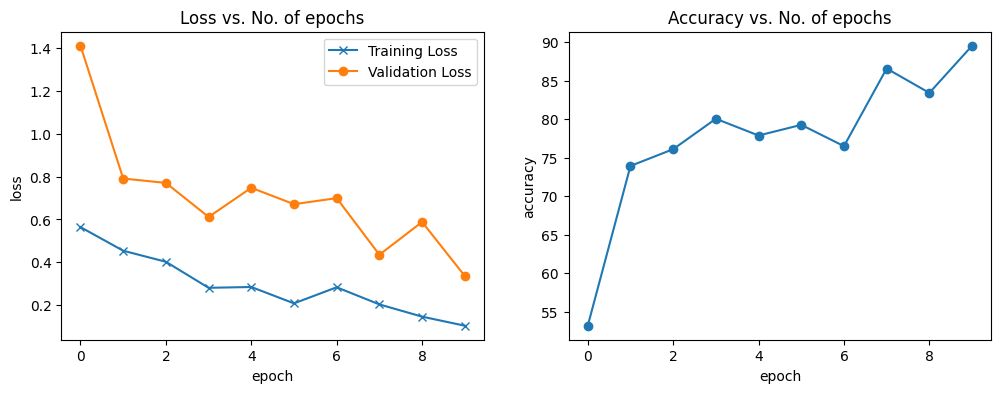

In [79]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-x', label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')

# Plotting the validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, '-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plt.show()

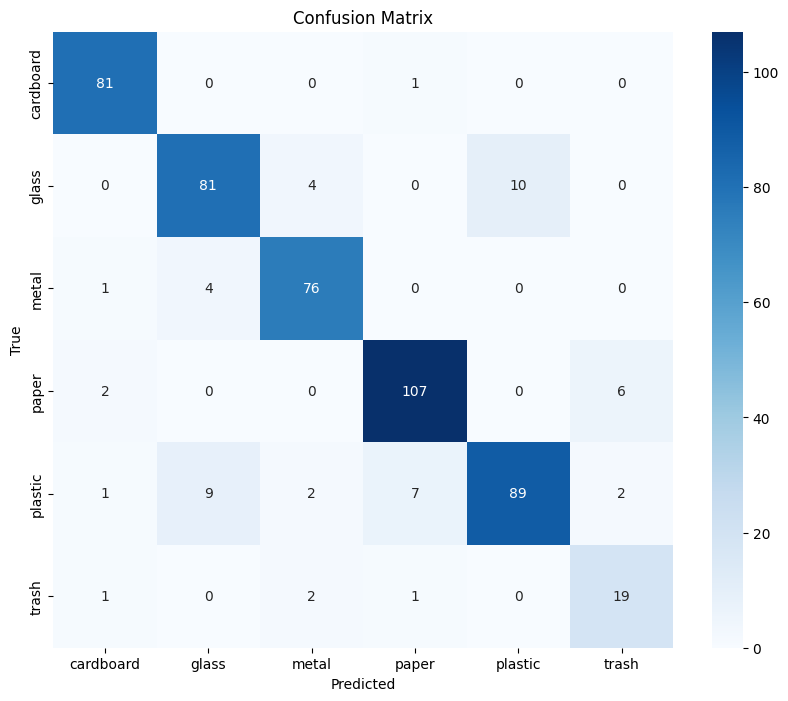

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

true_labels = []
predicted_labels = []

model.eval()


with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

confusion_mat = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## DenseNet(With Data Preprocessing)

Loading the data and Preprocessing

Firstly, the image is resized to 256x256 pixels.

Transforms RandomHorizontalFlip(): RandomHorizontalFlip an image horizontally to increase data diversity.

Transforms RandomRotation (10): Randomly rotate the image up to 10 degrees to simulate shooting from different angles.

Transforms RandomCrop (224): RandomCrop the image to a size of 224x224 pixels, simulating objects in different positions.

Transforms ToTensor(): Converts the image to tensor format for input into a neural network.

In [82]:
data_dir  = '/content/Garbage classification/Garbage classification'
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
print(classes)

from torchvision.datasets import ImageFolder

augmented_transformations = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224),
    transforms.ToTensor()
])

dataset = ImageFolder(data_dir, transform=augmented_transformations)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


Visualize some image data

Label: cardboard (Class No: 0)


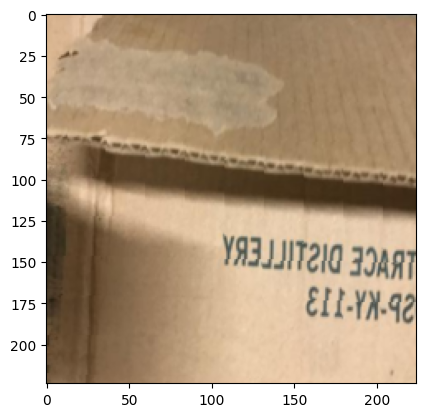

In [83]:
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

img, label = dataset[12]
show_sample(img, label)

We used the densenet121 model from PyTorch, which is a pre trained DenseNet-121 model. Modified the last classification layer of this pre trained model to accommodate the number of classifications for specific tasks

In [84]:
from torchvision.models import densenet121

model = densenet121(pretrained=True)


num_classes = len(classes)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Defined a function for training the model

In [85]:
# 1. Training function
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    return avg_loss

Defined a function for verifying model performance

In [86]:
# 2. Validation function
def validate_one_epoch(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(val_loader.dataset)
    accuracy = (correct_predictions / len(val_loader.dataset)) * 100.0
    return avg_loss, accuracy

Split the original dataset into training sets_ Dataset ` and Validation Set ` val_ Dataset `. The segmentation ratio is 80% for training and 20% for validation.
Load training data with a batch size of 32.
Load validation data with a batch size of 32, but do not randomly shuffle (shuffle=False) when loading data to ensure sequential consistency during validation.

In [87]:
from torch.utils.data import random_split, DataLoader

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [88]:
# Setting the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train for one epoch
train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
print(f"Training loss: {train_loss:.4f}")

# Validate after training
val_loss, val_accuracy = validate_one_epoch(model, val_loader, criterion, device)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")

Training loss: 0.9740
Validation loss: 0.9502, Validation accuracy: 66.01%


### Start Training

In [92]:
num_epochs = 10  # Define the number of epochs you want

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print('-' * 10)

    # Train for one epoch
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    print(f"Training loss: {train_loss:.4f}")

    # Validate after training
    val_loss, val_accuracy = validate_one_epoch(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")
    print()

Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training loss: 0.2890
Validation loss: 0.6255, Validation accuracy: 76.28%

Epoch 2/10
----------
Training loss: 0.2345
Validation loss: 0.6001, Validation accuracy: 81.82%

Epoch 3/10
----------
Training loss: 0.2796
Validation loss: 0.5355, Validation accuracy: 81.42%

Epoch 4/10
----------
Training loss: 0.2517
Validation loss: 0.8448, Validation accuracy: 72.73%

Epoch 5/10
----------
Training loss: 0.2722
Validation loss: 0.5693, Validation accuracy: 80.43%

Epoch 6/10
----------
Training loss: 0.2388
Validation loss: 0.7536, Validation accuracy: 77.87%

Epoch 7/10
----------
Training loss: 0.1725
Validation loss: 0.4889, Validation accuracy: 83.00%

Epoch 8/10
----------
Training loss: 0.2049
Validation loss: 0.5929, Validation accuracy: 81.62%

Epoch 9/10
----------
Training loss: 0.1285
Validation loss: 0.3748, Validation accuracy: 87.94%

Epoch 10/10
----------
Training loss: 0.1366
Validation loss: 0.8325, Validation accuracy: 80.83%



### Results & Evaluation

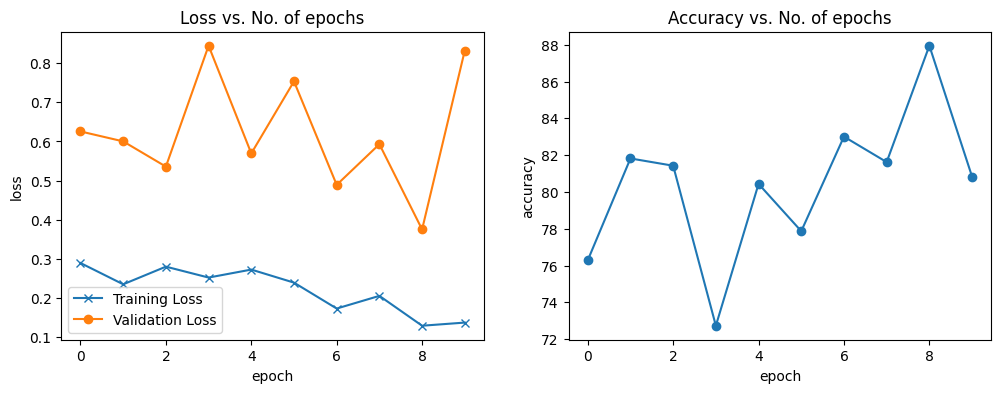

In [93]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-x', label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')

# Plotting the validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, '-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plt.show()

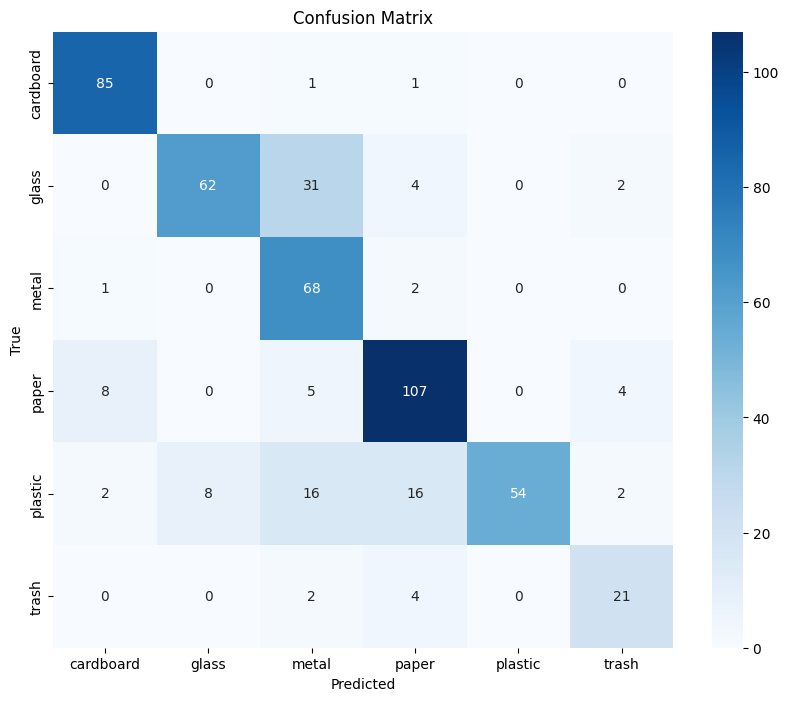

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

true_labels = []
predicted_labels = []

model.eval()


with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

confusion_mat = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Discussion

This is the result of multiple experiments. After the primary experiment, the model's prediction accuracy for unprocessed and preprocessed data was 80% and 82%, respectively. After multiple experiments, the accuracy of the model for both unprocessed and preprocessed data changed to 89% and 80%, respectively. We believe that the model exhibits overfitting, as data preprocessing may increase the model's capacity, making it easier to overfit the training data. Overfitting can lead to a decrease in the performance of the model on test data. Here we refer to the results of the initial experiment. We can observe that our data preprocessing has slightly improved the prediction results of the model. Overall, only 82% accuracy cannot meet our requirements. We can see that the losses on the model training set can quickly converge to a small range, but on the validation set, the losses of the model converge slowly and even have some fluctuations. We speculate that this is due to insufficient training times, and we believe that the complexity of the model may be too high, making it unsuitable for rapid training to achieve the expected results.

## Method3: Vgg19

VGG19 (Visual Geometry Group 19) is a deep convolutional neural network (CNN) model used for image classification. It is one of the VGG series models that can solve image classification and target recognition problems. VGG19 consists of 19 convolutional layers and fully connected layers. The main characteristics of this network are the depth and uniformity of the convolutional layer. Each convolution layer of VGG19 adopts a 3x3 small convolution kernel with a step of 1 to maintain the size of the input feature map. After the convolutional layer, a pooling layer was used to reduce the size of the feature map. The depth and uniformity of the VGG19 model make it a powerful image feature extractor, particularly suitable for large-scale image classification tasks. Technical reference: https://ww2.mathworks.cn/help/deeplearning/ref/vgg19.html Code adapted from:https://www.kaggle.com/code/madz2000/flowers-classification-using-vgg19-88-accuracy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19, ResNet50
import cv2
import os
import random
import tensorflow as tf
import numpy as np

### Loading the Dataset

In [ ]:
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
img_size = 224

def get_data(data_dir):
    image_data = []
    label_data = []

    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label) + 1  # 加1，使标签范围为1-6

        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                image_data.append(resized_arr)
                label_data.append(class_num)
            except Exception as e:
                print(e)

    return np.array(image_data), np.array(label_data)



image_data, label_data = get_data("/content/Garbage classification/Garbage classification")

## Vgg19(Without Data Preprocessing)

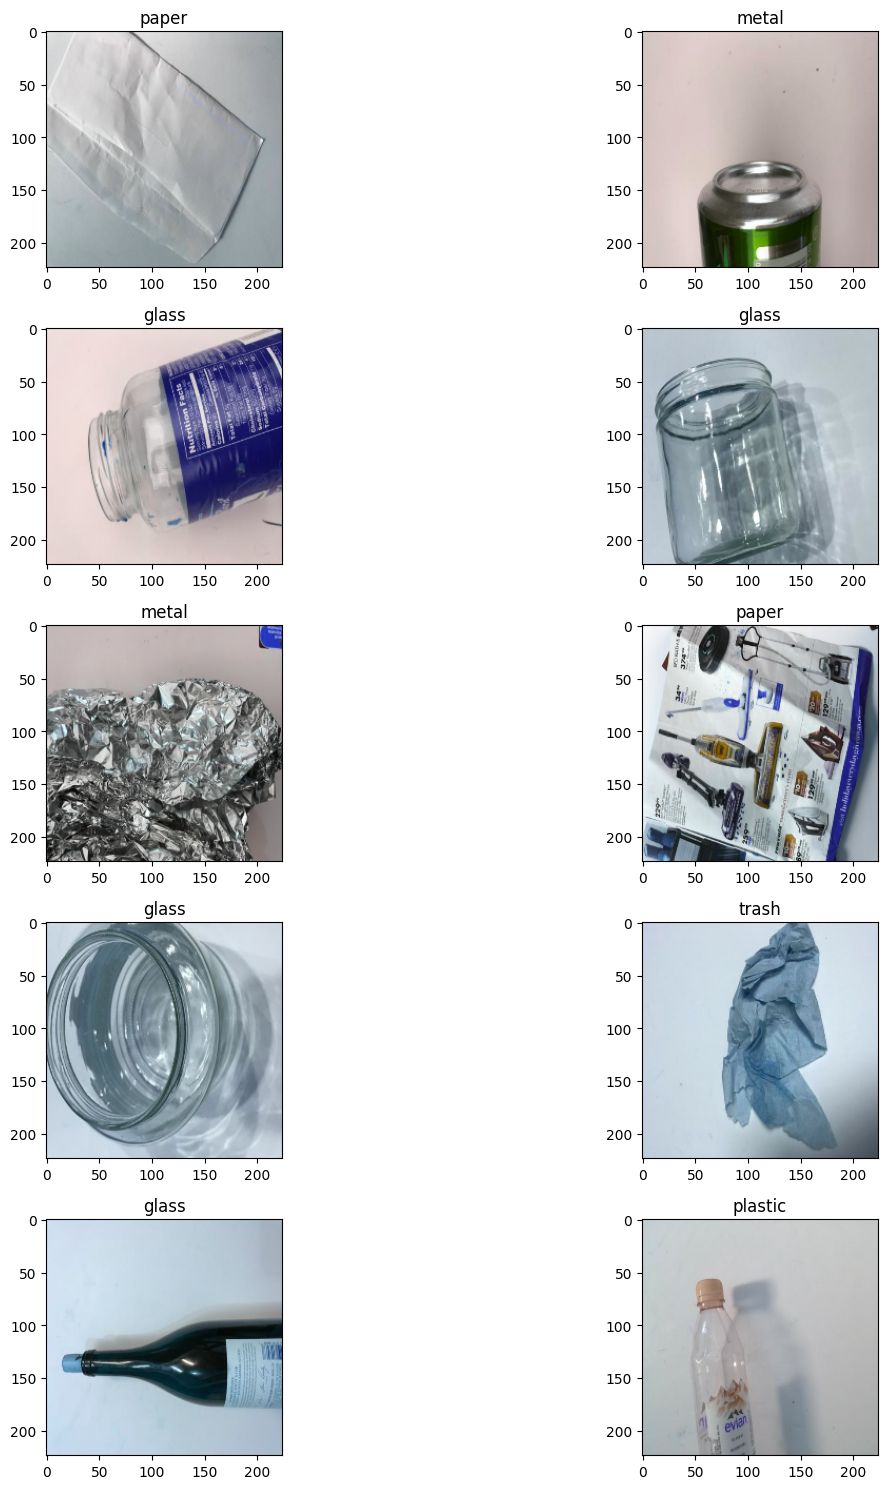

In [ ]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range(2):
        l = random.randint(0, len(image_data) - 1)
        ax[i, j].imshow(image_data[l])
        ax[i, j].set_title(labels[label_data[l] - 1])

plt.tight_layout()

In [ ]:
x = image_data.tolist()
y = label_data.tolist()

In [ ]:
x = image_data.tolist()
y = label_data.tolist()

# no Normalization of data
x = np.array(x)

y = np.array(y)

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

print("Image data shape:", x.shape)
print("Label data shape:", y.shape)


Image data shape: (2527, 224, 224, 3)
Label data shape: (2527, 6)


In [ ]:
def custom_train_test_split(x, y, test_size=0.2, stratify=None, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(len(x))
    if stratify is not None:
        stratify_labels = np.argmax(stratify, axis=1)
        unique_labels, counts = np.unique(stratify_labels, return_counts=True)
        test_counts = (counts * test_size).astype(int)

        test_indices = []
        for label, count in zip(unique_labels, test_counts):
            label_indices = indices[stratify_labels == label]
            test_indices.extend(np.random.choice(label_indices, size=count, replace=False))

        test_indices = np.array(test_indices)
    else:
        test_indices = np.random.choice(indices, size=int(len(indices) * test_size), replace=False)

    train_indices = np.array(list(set(indices) - set(test_indices)))

    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

x_train, x_test, y_train, y_test = custom_train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


train the model

In [ ]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(6 , activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 6)                 27654     
                                                                 
Total params: 20052038 (76.49 MB)
Trainable params: 4747270 (18.11 MB)
Non-trainable params: 15304768 (58.38 MB)
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

### Start training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import VGG19
import cv2
import os
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.backend import clear_session

clear_session()

tf.keras.backend.clear_session()


import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


history = model.fit(x_train,y_train, batch_size = 64 , epochs = 12 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Physical devices cannot be modified after being initialized
Epoch 1/12
32/32 [==============================] - 22s 311ms/step - loss: 3.2662 - accuracy: 0.2757 - val_loss: 1.7404 - val_accuracy: 0.2783 - lr: 0.0010
Epoch 2/12
32/32 [==============================] - 4s 141ms/step - loss: 1.7154 - accuracy: 0.3177 - val_loss: 1.6119 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 3/12
32/32 [==============================] - 4s 141ms/step - loss: 1.7049 - accuracy: 0.3394 - val_loss: 1.6311 - val_accuracy: 0.3201 - lr: 0.0010
Epoch 4/12
32/32 [==============================] - 4s 141ms/step - loss: 1.6962 - accuracy: 0.2841 - val_loss: 1.6232 - val_accuracy: 0.3380 - lr: 0.0010
Epoch 5/12
32/32 [==============================] - 5s 142ms/step - loss: 1.6014 - accuracy: 0.3370 - val_loss: 1.5839 - val_accuracy: 0.3300 - lr: 0.0010
Epoch 6/12
32/32 [==============================] - ETA: 0s - loss: 1.5722 - accuracy: 0.3345
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.000300000014249

### Results and Evaluation

16/16 [==============================] - 3s 123ms/step - loss: 1.5835 - accuracy: 0.3360
Loss of the model is -  1.5834641456604004
16/16 [==============================] - 1s 56ms/step - loss: 1.5835 - accuracy: 0.3360
Accuracy of the model is -  33.5984081029892 %


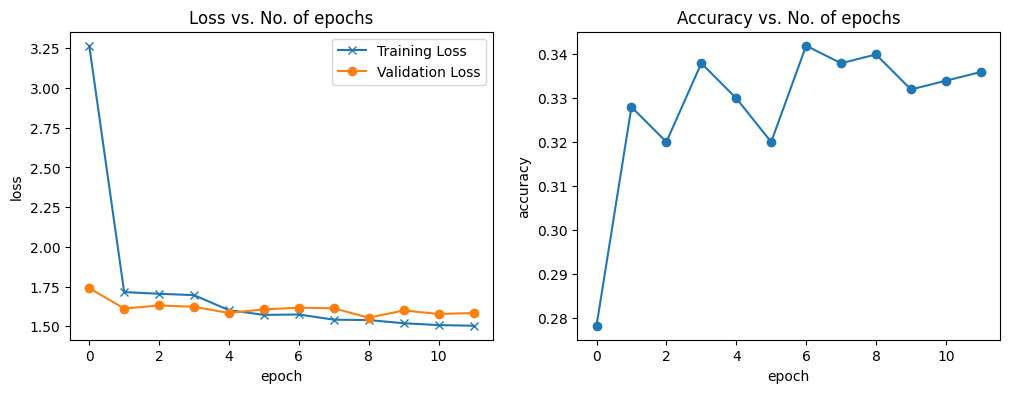

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


train_losses = history.history['loss']
val_losses = history.history['val_loss']
val_accuracies = history.history['val_accuracy']


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(train_losses, '-x', label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')


plt.subplot(1, 2, 2)
plt.plot(val_accuracies, '-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

plt.show()

16/16 [==============================] - 1s 52ms/step


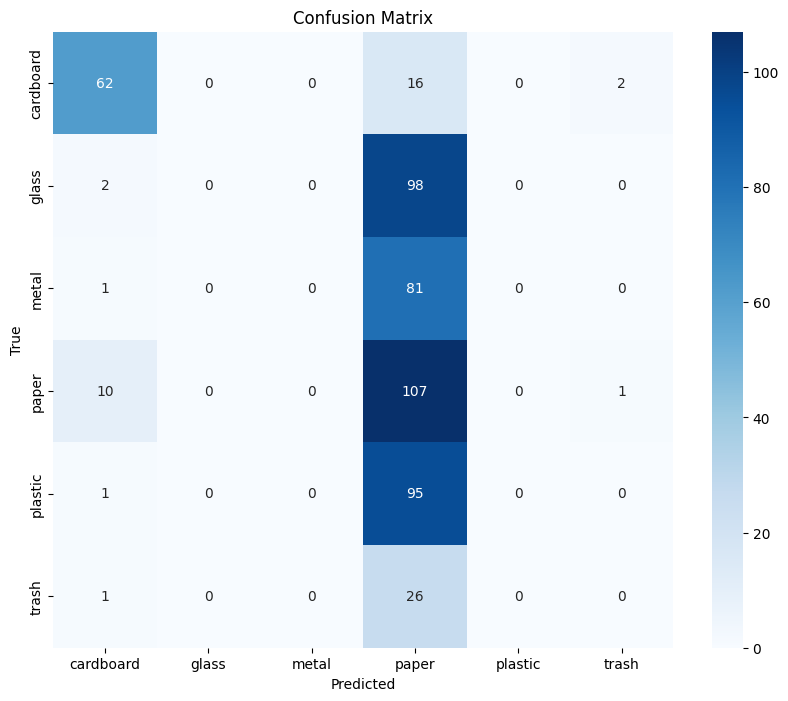

              precision    recall  f1-score   support

   cardboard       0.81      0.78      0.79        80
       glass       0.00      0.00      0.00       100
       metal       0.00      0.00      0.00        82
       paper       0.25      0.91      0.40       118
     plastic       0.00      0.00      0.00        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.34       503
   macro avg       0.18      0.28      0.20       503
weighted avg       0.19      0.34      0.22       503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)


confusion_mtx = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print(class_report)


## Vgg19(With Data Preprocessing)

### Data Visualization and Preprocessing(Normalization of data)

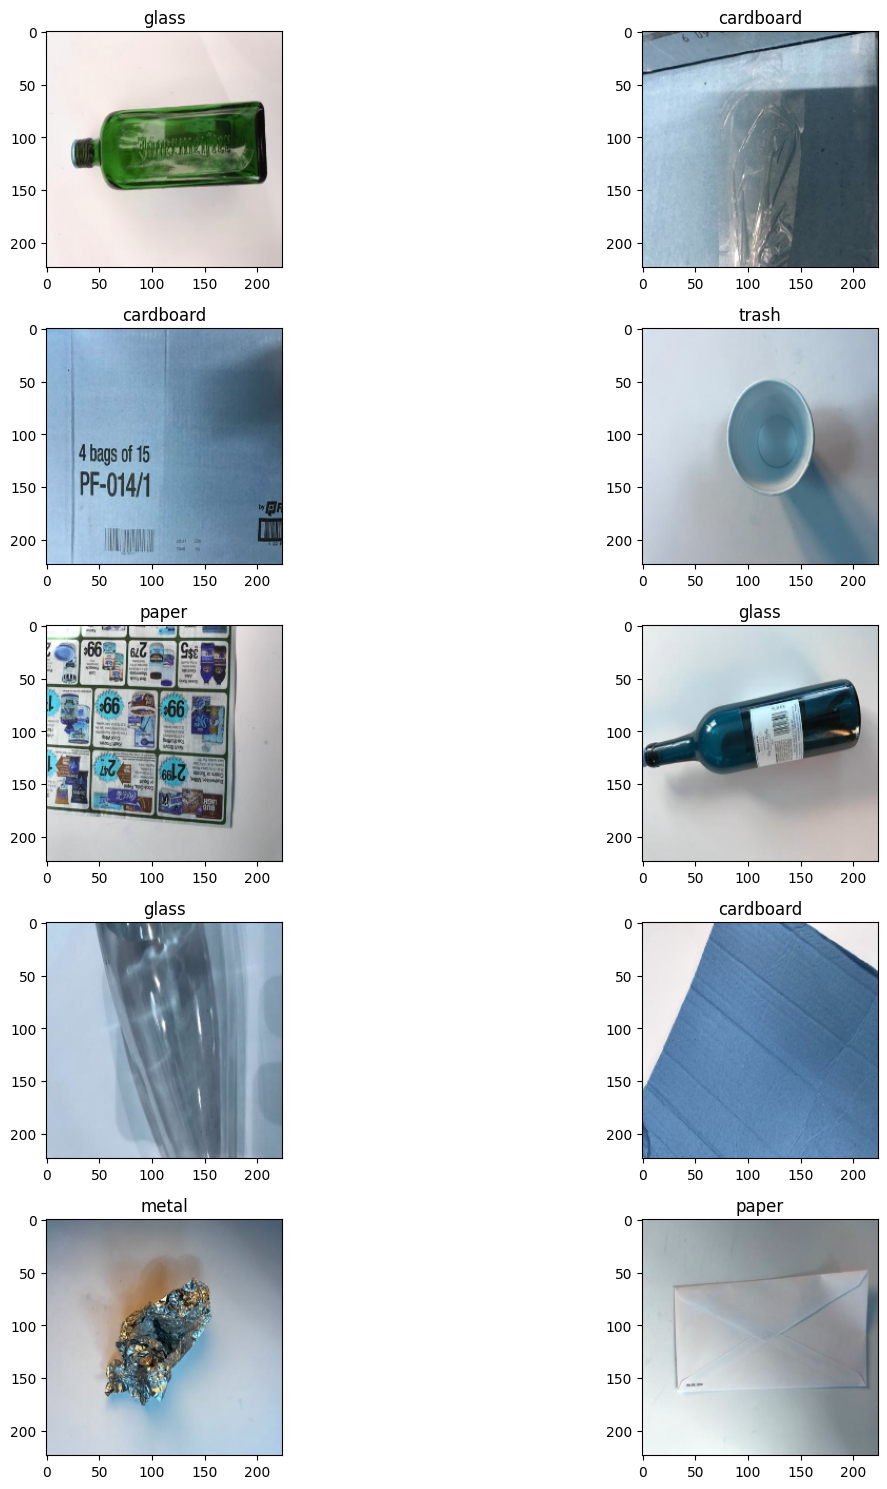

In [ ]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range(2):
        l = random.randint(0, len(image_data) - 1)
        ax[i, j].imshow(image_data[l])
        ax[i, j].set_title(labels[label_data[l] - 1])

plt.tight_layout()

In [ ]:
x = image_data.tolist()
y = label_data.tolist()

We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].

In [ ]:
# Normalize the data
x = np.array(x) / 255.0
y = np.array(y)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
print("Image data shape:", x.shape)
print("Label data shape:", y.shape)

Image data shape: (2527, 224, 224, 3)
Label data shape: (2527, 6)


Divide training and validation sets

In [ ]:
def custom_train_test_split(x, y, test_size=0.2, stratify=None, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(len(x))
    if stratify is not None:
        stratify_labels = np.argmax(stratify, axis=1)
        unique_labels, counts = np.unique(stratify_labels, return_counts=True)
        test_counts = (counts * test_size).astype(int)

        test_indices = []
        for label, count in zip(unique_labels, test_counts):
            label_indices = indices[stratify_labels == label]
            test_indices.extend(np.random.choice(label_indices, size=count, replace=False))

        test_indices = np.array(test_indices)
    else:
        test_indices = np.random.choice(indices, size=int(len(indices) * test_size), replace=False)

    train_indices = np.array(list(set(indices) - set(test_indices)))

    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

x_train, x_test, y_train, y_test = custom_train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)


REPLICAS:  1


Train the Model

In [ ]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(6 , activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 6)                 27654     
                                                                 
Total params: 20052038 (76.49 MB)
Trainable params: 4747270 (18.11 MB)
Non-trainable params: 15304768 (58.38 MB)
_________________________________________________________________


Use the ReduceLROnPlateau callback function in Keras to dynamically reduce the learning rate during training to help the model converge better.

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

### Start training

In [ ]:
history = model.fit(x_train,y_train, batch_size = 64 , epochs = 12 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/12
32/32 [==============================] - 6s 153ms/step - loss: 1.4677 - accuracy: 0.4274 - val_loss: 1.1238 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 2/12
32/32 [==============================] - 4s 126ms/step - loss: 0.8198 - accuracy: 0.6971 - val_loss: 0.8178 - val_accuracy: 0.6899 - lr: 0.0010
Epoch 3/12
32/32 [==============================] - 4s 126ms/step - loss: 0.5119 - accuracy: 0.8182 - val_loss: 0.7631 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 4/12
32/32 [==============================] - 4s 126ms/step - loss: 0.3354 - accuracy: 0.8839 - val_loss: 0.6904 - val_accuracy: 0.7515 - lr: 0.0010
Epoch 5/12
32/32 [==============================] - 4s 127ms/step - loss: 0.1990 - accuracy: 0.9353 - val_loss: 0.7207 - val_accuracy: 0.7555 - lr: 0.0010
Epoch 6/12
32/32 [==============================] - 4s 127ms/step - loss: 0.1079 - accuracy: 0.9708 - val_loss: 0.8413 - val_accuracy: 0.7416 - lr: 0.0010
Epoch 7/12
32/32 [==============================] - 4s 127ms/step - lo

### Results & Evaluation

16/16 [==============================] - 1s 50ms/step - loss: 0.7831 - accuracy: 0.7654
Loss of the model is -  0.783115804195404
16/16 [==============================] - 1s 50ms/step - loss: 0.7831 - accuracy: 0.7654
Accuracy of the model is -  76.54075622558594 %


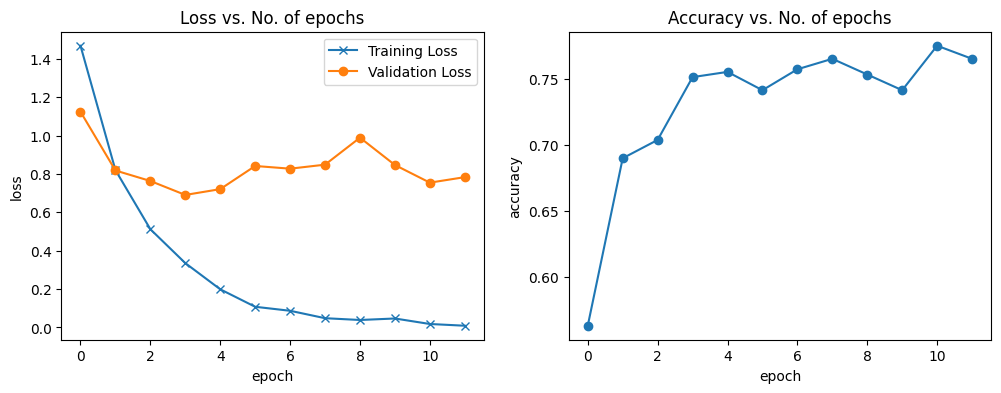

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


train_losses = history.history['loss']
val_losses = history.history['val_loss']
val_accuracies = history.history['val_accuracy']


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(train_losses, '-x', label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')


plt.subplot(1, 2, 2)
plt.plot(val_accuracies, '-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

plt.show()

16/16 [==============================] - 1s 46ms/step


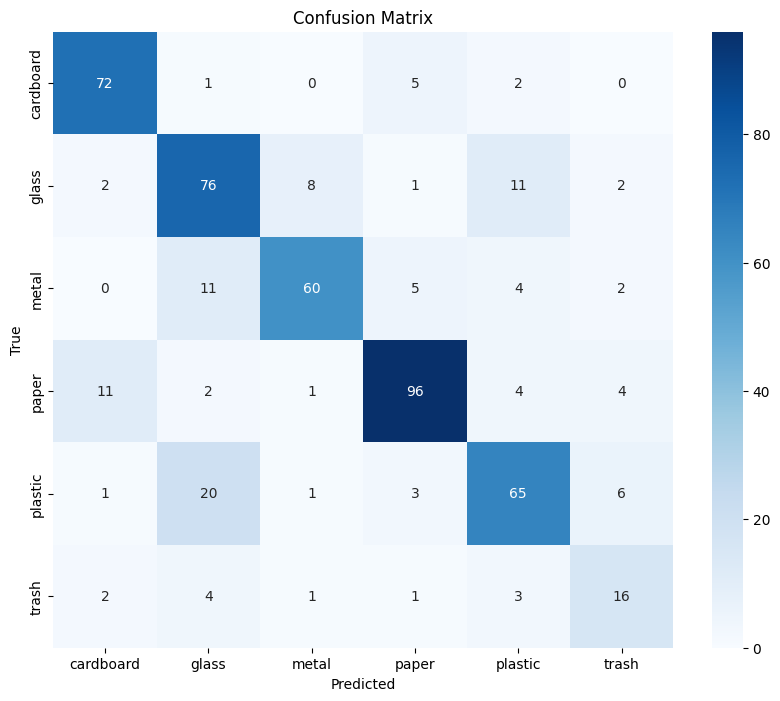

              precision    recall  f1-score   support

   cardboard       0.82      0.90      0.86        80
       glass       0.67      0.76      0.71       100
       metal       0.85      0.73      0.78        82
       paper       0.86      0.81      0.84       118
     plastic       0.73      0.68      0.70        96
       trash       0.53      0.59      0.56        27

    accuracy                           0.77       503
   macro avg       0.74      0.75      0.74       503
weighted avg       0.77      0.77      0.77       503



In [ ]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print(class_report)


### Discussion

Like DenseNet, the Vgg19 we selected also had low accuracy issues after the experiment. We speculate that this is a problem of insufficient training, as Vgg19 is suitable for processing large-scale image data. At the same time, we found that the model's losses on the validation set were not well fitted, which may also be the reason for the insufficient training effect of the model. However, our normalization of the data greatly affects the prediction results of the model.

## Method4: ResNet

ResNet (Residual Network) is an architecture of deep convolutional neural networks. The core idea of ResNet is to introduce Residual Connection or Shortcut Connection to solve the problems of gradient vanishing and exploding during the training process of deep neural networks.
Traditional deep neural networks typically encounter some problems as the number of network layers increases, one of the main problems being gradient vanishing. In backpropagation, the gradient gradually decreases, making it difficult to effectively update parameters in deep networks, resulting in training difficulties. The residual connection proposed by ResNet allows information to jump and propagate between layers, allowing the network to learn the residual function, which is the difference between input and expected output, rather than directly learning the entire mapping. This design helps alleviate the problem of gradient vanishing, making the network deeper and easier to train.
The ResNet architecture has brought significant performance improvements to computer vision tasks such as image classification, object detection, and semantic segmentation.
Technical reference:https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8

Firstly, let's read the data.

In [ ]:
data_dir  = '/content/Garbage classification/Garbage classification'

classes = os.listdir(data_dir)
print(classes)

['cardboard', 'glass', 'trash', 'paper', 'plastic', 'metal']


## ResNet(Without Data preprocessing)(without Normalization)

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

dataset = ImageFolder(data_dir, transform = transformations)

import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))



Label: cardboard (Class No: 0)


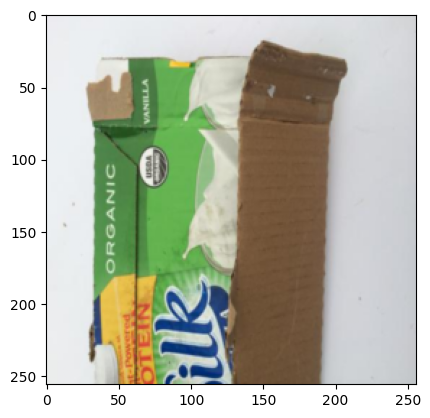

In [ ]:
img, label = dataset[88]
show_sample(img, label)

In [ ]:
import torch

random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
import random
from torch.utils.data import random_split

total_length = len(dataset)
train_length = int(total_length * 0.6)
val_length = int(total_length * 0.1)
test_length = total_length - train_length - val_length

train_ds, val_ds, test_ds = random_split(dataset, [train_length, val_length, test_length])

print(f"train: {len(train_ds)}")
print(f"validation: {len(val_ds)}")
print(f"test: {len(test_ds)}")

train: 1516
validation: 252
test: 759


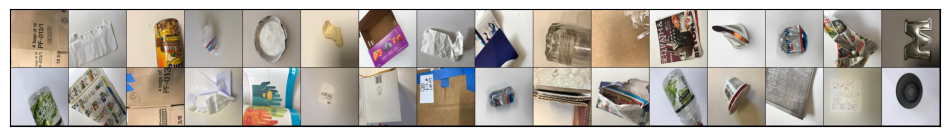

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32

train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)

from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

show_batch(train_dl)

In [ ]:
import torch.nn as nn

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy

        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
import torchvision.models as models

class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))

    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ResNet(), device)

evaluate(model, val_dl)

{'val_loss': 1.7949451208114624, 'val_acc': 0.1653645783662796}

### Start training

In [ ]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch 1: train_loss: 1.4696, val_loss: 1.2685, val_acc: 0.8099
Epoch 2: train_loss: 1.1821, val_loss: 1.1654, val_acc: 0.9091
Epoch 3: train_loss: 1.0986, val_loss: 1.1371, val_acc: 0.9211
Epoch 4: train_loss: 1.0764, val_loss: 1.1270, val_acc: 0.9326
Epoch 5: train_loss: 1.0622, val_loss: 1.1187, val_acc: 0.9326
Epoch 6: train_loss: 1.0582, val_loss: 1.1141, val_acc: 0.9401
Epoch 7: train_loss: 1.0575, val_loss: 1.1288, val_acc: 0.9161
Epoch 8: train_loss: 1.0547, val_loss: 1.1129, val_acc: 0.9401
Epoch 9: train_loss: 1.0577, val_loss: 1.1220, val_acc: 0.9286
Epoch 10: train_loss: 1.0591, val_loss: 1.1375, val_acc: 0.9125
Epoch 11: train_loss: 1.0536, val_loss: 1.1141, val_acc: 0.9286
Epoch 12: train_loss: 1.0544, val_loss: 1.1220, val_acc: 0.9211
Epoch 13: train_loss: 1.0544, val_loss: 1.1224, val_acc: 0.9203
Epoch 14: train_loss: 1.0553, val_loss: 1.1285, val_acc: 0.9133
Epoch 15: train_loss: 1.0549, val_loss: 1.1333, val_acc: 0.9078
Epoch 16: train_loss: 1.0516, val_loss: 1.1137, v

### Results & Evaluation

In [ ]:
@torch.no_grad()
def evaluate_accuracy(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    for batch in val_loader:
        images, labels = batch
        outputs = model(images)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy


val_accuracy = evaluate_accuracy(model, val_dl)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Validation Accuracy: 93.25%


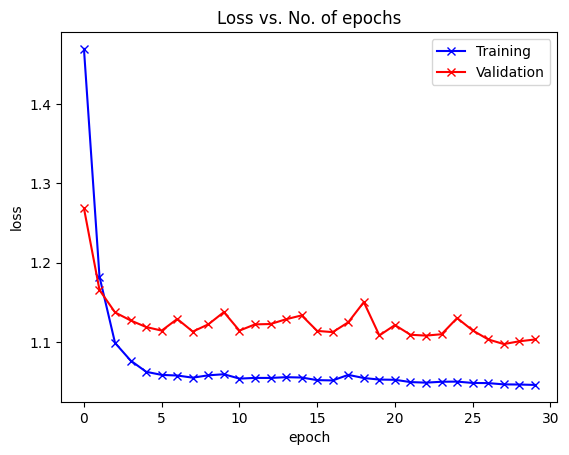

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

Confusion Matrix:
[[107   1   0   5   0   0]
 [  0 137   4   1   3   0]
 [  0   5 124   0   0   0]
 [  0   0   0 172   1   2]
 [  0   6   8   3 132   0]
 [  3   1   1   4   2  37]]


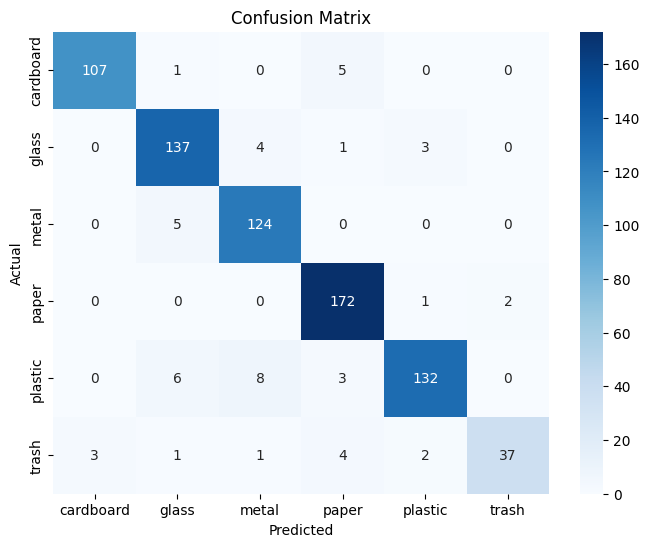

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


test_batch_size = 32
test_dl = DataLoader(test_ds, test_batch_size, shuffle=False, num_workers=4, pin_memory=True)


test_dl = DeviceDataLoader(test_dl, device)


test_gt, test_preds = predict_dl(test_dl, model)


confusion = confusion_matrix(test_gt, test_preds)


print("Confusion Matrix:")
print(confusion)
import seaborn as sns
import matplotlib.pyplot as plt


confusion = confusion_matrix(test_gt, test_preds)

）
class_names = dataset.classes


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ResNet(With Data preprocessing)(with Resize & Normalization)



In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms



mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


transformations = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])


dataset = ImageFolder(data_dir, transform=transformations)



Verify that the image dataset has been correctly read and visualized.

Label: cardboard (Class No: 0)


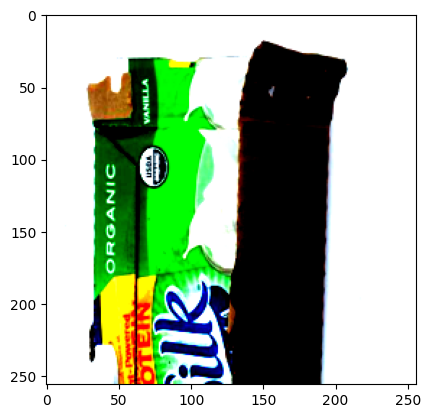

In [ ]:
img, label = dataset[88]
show_sample(img, label)

Label: glass (Class No: 1)


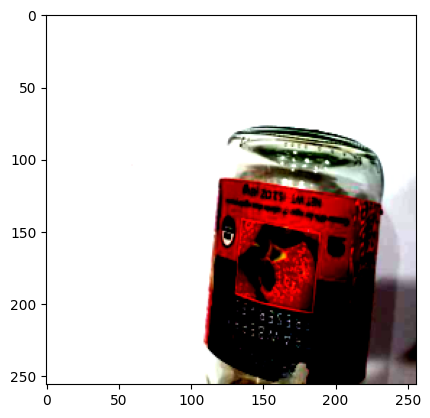

In [ ]:
img, label = dataset[717]
show_sample(img, label)

In [ ]:
import torch

random_seed = 42
torch.manual_seed(random_seed)

Divide the train set, validation set, and test set.

In [ ]:
import random
from torch.utils.data import random_split

total_length = len(dataset)
train_length = int(total_length * 0.6)
val_length = int(total_length * 0.1)
test_length = total_length - train_length - val_length

train_ds, val_ds, test_ds = random_split(dataset, [train_length, val_length, test_length])

print(f"train: {len(train_ds)}")
print(f"validation: {len(val_ds)}")
print(f"test: {len(test_ds)}")

train: 1516
validation: 252
test: 759


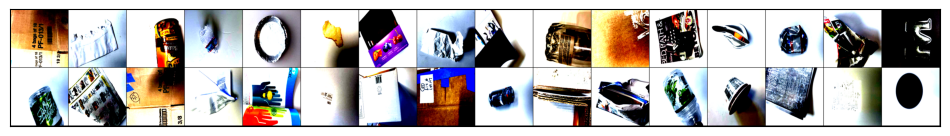

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32

train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)

from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

show_batch(train_dl)

Define a basic neural network model class for image classification tasks, as well as a function for calculating accuracy.

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy

        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

Define an image classification model class called 'ResNet', which inherits from the previously defined 'ImageClassificationBase' class and uses the pre trained ResNet-50 model as its base model. Finally, an instance of 'model' was created, which is an object of the 'ResNet' class and can be used for training and testing image classification tasks. This model adds a fully connected layer suitable for the dataset on top of the basic ResNet-50 model for outputting classification results.

In [ ]:
class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))

    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Defined some utility functions and classes for processing devices (GPUs or CPUs) in PyTorch.

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

Wrap the training data loader and validation data loader in DeviceDataLoader, and move the model model to the specified device. It ensures that all data and models are on the same device during training and validation, which helps improve training efficiency and accuracy. During the training process, the model will perform forward and backward propagation on the specified device, while the data loader will ensure that each batch of data is also on the same device.

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

These functions are used for model training and evaluation.

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Calculate the performance indicators such as loss and accuracy of the model on the validation dataset, and return these indicators.

In [ ]:
model = to_device(ResNet(), device)

evaluate(model, val_dl)

{'val_loss': 1.79374098777771, 'val_acc': 0.16953125596046448}

### Start training

The training process of the model started using the Adam optimizer and the specified learning rate. The training cycle is 30.

In [ ]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch 1: train_loss: 1.4684, val_loss: 1.2704, val_acc: 0.8500
Epoch 2: train_loss: 1.1794, val_loss: 1.1683, val_acc: 0.8971
Epoch 3: train_loss: 1.0973, val_loss: 1.1353, val_acc: 0.9328
Epoch 4: train_loss: 1.0766, val_loss: 1.1195, val_acc: 0.9445
Epoch 5: train_loss: 1.0617, val_loss: 1.1115, val_acc: 0.9443
Epoch 6: train_loss: 1.0591, val_loss: 1.1138, val_acc: 0.9438
Epoch 7: train_loss: 1.0577, val_loss: 1.1140, val_acc: 0.9565
Epoch 8: train_loss: 1.0572, val_loss: 1.1290, val_acc: 0.9201
Epoch 9: train_loss: 1.0598, val_loss: 1.1260, val_acc: 0.9208
Epoch 10: train_loss: 1.0556, val_loss: 1.1212, val_acc: 0.9167
Epoch 11: train_loss: 1.0515, val_loss: 1.1062, val_acc: 0.9365
Epoch 12: train_loss: 1.0523, val_loss: 1.1258, val_acc: 0.9247
Epoch 13: train_loss: 1.0530, val_loss: 1.1086, val_acc: 0.9443
Epoch 14: train_loss: 1.0636, val_loss: 1.1499, val_acc: 0.9010
Epoch 15: train_loss: 1.0562, val_loss: 1.1140, val_acc: 0.9328
Epoch 16: train_loss: 1.0516, val_loss: 1.1250, v

### Results & Evaluation

In [ ]:
@torch.no_grad()
def evaluate_accuracy(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    for batch in val_loader:
        images, labels = batch
        outputs = model(images)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy


val_accuracy = evaluate_accuracy(model, val_dl)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')






Validation Accuracy: 93.25%


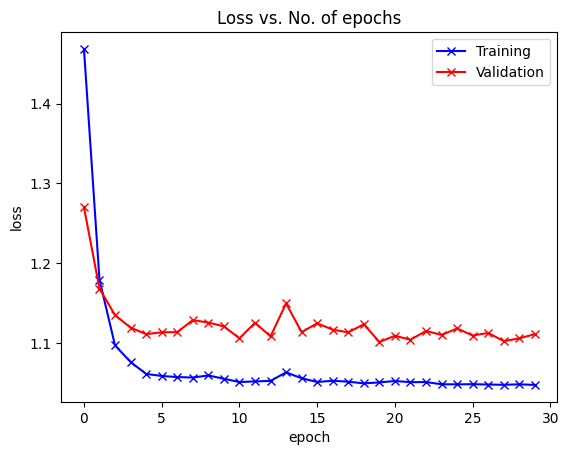

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)






Confusion Matrix:
[[108   0   1   4   0   0]
 [  0 136   6   1   2   0]
 [  0   5 124   0   0   0]
 [  2   0   0 171   1   1]
 [  0   7   6   1 135   0]
 [  7   0   2   3   3  33]]


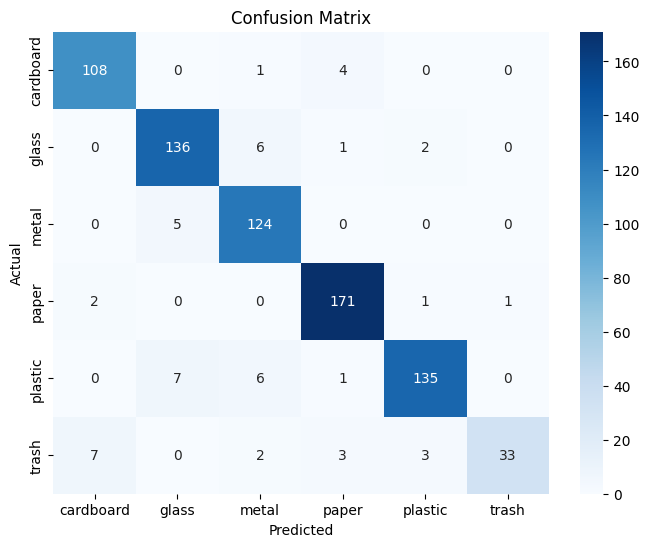

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


test_batch_size = 32
test_dl = DataLoader(test_ds, test_batch_size, shuffle=False, num_workers=4, pin_memory=True)


test_dl = DeviceDataLoader(test_dl, device)


test_gt, test_preds = predict_dl(test_dl, model)


confusion = confusion_matrix(test_gt, test_preds)


print("Confusion Matrix:")
print(confusion)
import seaborn as sns
import matplotlib.pyplot as plt


confusion = confusion_matrix(test_gt, test_preds)


class_names = dataset.classes


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Discussion

After comparing the predicted results of the model on whether to normalize the data, we can find that the accuracy of the model on the validation set is ultimately stable at 94%. We believe that ResNet has strong feature learning ability and robustness. This type of model is usually less sensitive to the scaling of input data, as they can learn to adapt to different ranges of inputs. 94% accuracy is a relatively good result. At the same time, we visualize the loss of training and validation sets during the training process. The training set loss can quickly converge and stabilize. Although the loss of the validation set can converge quickly, there are also fluctuations. We speculate that different small batches of data are used to verify this in each training cycle. These small batches of data were randomly selected from the validation set, which may lead to fluctuations in validation set losses. We believe that this randomness is normal. Overall, we are satisfied with the performance of the model.

### Visualize the validation of classification results.

We extract some classified image data samples for display.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: cardboard , Predicted: cardboard


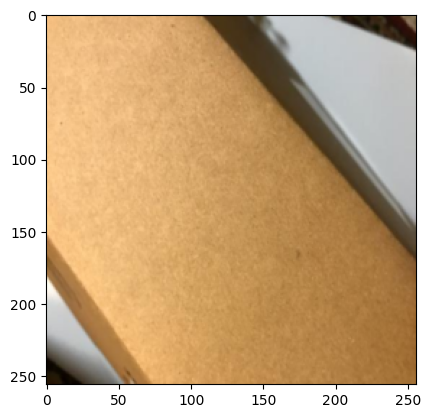

In [ ]:
img, label = test_ds[37]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: paper , Predicted: paper


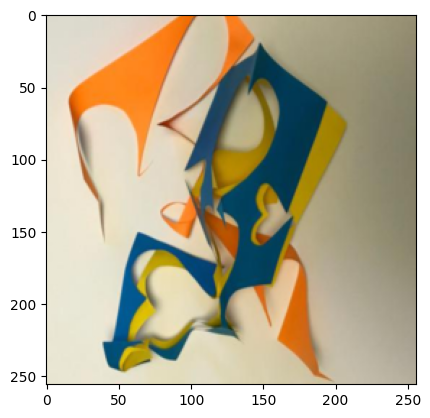

In [ ]:
img, label = test_ds[612]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: metal , Predicted: metal


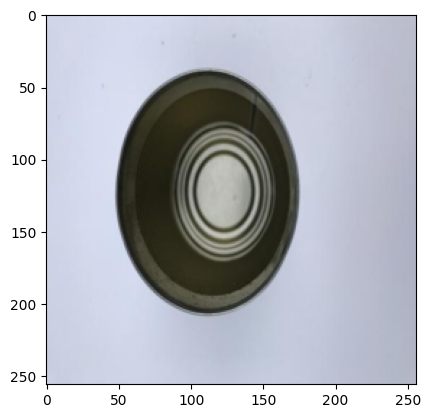

In [ ]:
img, label = test_ds[413]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

## Future Work

In order to verify the universality of the model, we collected some new images to validate the model. The model will tell us the classification situation.

In [ ]:
import urllib.request
urllib.request.urlretrieve("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAHkAtgMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAACAAEDBAUGB//EAEAQAAIBAwIDBQQHBQYHAAAAAAECAwAEERIhBTFBE1FhcYEikaGxBhQyQlLB8CMzYnLRFSRTkuHxBxZEY4Kiwv/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACERAQEAAgICAwADAAAAAAAAAAABAhEDMRIhBEFRExRh/9oADAMBAAIRAxEAPwD2XFPSpxUrONqaR0iQySusaDmzsAB61Dd3BiUJGA0z/ZB5DxOOn68sOfh1rPdBryNeI3Q3HbIGWMevsoPIZPjV4477Z5Z66dJBNFPGJIZUkQ8mRgwPqKm5ivPeMcL/ALKcX/C+zsGd1t7iOzk0A53VsYxqBx03DHIxV3hv0zNnE1vx1WaWI6DcQx5DkAHLDkuVIPdnUPu73eG63j7R/LN6rthyp6zuGcYseJIGs7hH6aeRHpV4uFGWIAHWossuqvHKZTcHSqk/FLRX0iYOe6NS/wAhQ/2mCfZt5SOhOB+dSrS/Sqh/aJ/wG/zCjW/Q/aR18xn5UbGlylUKXMT8nHrtUoORQR6VKlTBUqVKgFQkcqKmNAD30DDnUlAxpmgK75PM+FNR9TkgUqAQpFgiFmOFUZJ7hTgVV4q6pZ4J/eSRx/5nAPzqZN08rqbU5ZZGZVQYurjf2h+7UdfTl4k0F9dRcHsNYjMsjuEii+9NKeh+ZPQA1DIDcXU0Tah203ZMf+0ihmHqW+Nc59KuLPbXE8tvGWa1kFhZw4wryMmXPiBqQY71x311cfH55TGOPk5PDG5MyeccQ4lKrqt3NArtPdjaKJ9JJjjXHI4xnmeuc0VjwuWS4uLSWV0VraGV2b2Mj9qvIcs7beFbH0d4TDaWCoVJjjXDEb9qw3Z/UgY8FFaHCIvrXEb6+kjXQZBDEcdEGMj1LV0Z8km5j9ObDC2y5fbzqKW74OOIC2YxvayyaWU41dmMgeRCGvT+EXS8Y4db3juXEi5IdsgfkNsVwH0seO24dxidyA89zcTDfcLo0DPrL8K676CWhteEWEc8RLGBHyY86CFQH2sc89PDzp/Lkz4sc72r4VyxyuP06OG0ihAKLuerEnHlk1PimupuyXQFJkP2QBk+JrHu+JTMywQO/bHOpY4yzAdMbV5sxr0LnppT3VvbsVlf2gMlUUuR545etU141ZSMRH2pxzyoUfOs7+zgpMt0kMBI/eXco1HyUb/KmiktCdFv9d4gw5tAvZp/mG/vNVMYnzyWL28xKpDNGuctqcDb/wAsUNv9IY7RkCyCZM4ZA66vQA86iy8OWWLhtiep09o488ZOfUVDII70H9s93tgn6pqUeWCaeoW67iGVJo1kjbUrDIPhR1ynAeJC0iS0lclVOFLdR3eBB6V1SsGUEHIPWoaHpUqVAKlSpqAY0DUZoGoNE4APTFNRMMDqfKlTAhWX9Jra4ueCTiyBa5iaOeJAfttG4cL66cetaoFGBUy6uzym5pyVnx3ht/cWt9FdIsPYuH7VgphOVJWQH7JAHWuPu7m2ub+1kac9lDfXEoK/Zld5SUOrljG+fKu3+kn0PsOLB7i1trGDiLc7iS1Da/5iMN6599cVxvgXEeBiGa/4gs0gUiIRW7aCO7P4tzgMQN+dd/x8sN+r7ef8jHOR0MV6zcKhhth/e7ghV2xgbBnA/COQzzxWtIq2FnFZ2/2tOhfzJ+JrzzhnHRYxF4beW4vn9ktcSKscSgeyMhvZUc8eHOn4x9IJLSHsonN3xO9AjEcQOHzyjiXmI883O7dO8af18rdOfHml67VOPn/mT6V2vBLRMwF0kuGU/wDTRnJJ7tTE+fsGvXraAxWYB0qyDl93PcPD/SuG/wCH/ATwrtLq7YXHGb7Es5zqCDOQARn2Fx6kDFdxdTBERFDMijOepboKy+VyTLKYY9R2cOHhjs2ntHIOw31E7aQenwqHAeCRbZmhTOGcbM3rzz1+HKpJIu2jNqWKhwWlYbHFR2dvFawFtUpiyVjEr6mOTyzzxnzrla7Zs1h2Y1wW0RRcft7+TIJ8htn0NQFZ7tsfWLy6/htY9EQ8M7kfCt6eFHI+sRJPIB7KPuo8x+VZ9zccUDHRMqIm/sLhPLJ/L405srqIYuEXKnV9UtbZB96eTUfjqz8KkuYYY1X61ezzNjZIQAvxz8Ki+tyynVl9Kjdo0ZiT19o42oJJIsZWzkbvadlRfcuWNPRb/ELRLcOUQ9krZ0tKQdJA2J+FW/o/xW5SK2l4krwPLGqTWzjBR8nSwB33Axjy8aAWpvFMTn2Dgv2Y07dwHQfHaqs9nMqy392oe5njCJblhqhVWYpIvXIyBipsXjlp3KOsiB0IKkZBHUUVcxwjiUltcG0uSMCV0IXcINTaSPDG3urplYMoZSCCMgjrU2Ll2elTUiaRmJoGzRNQk+tM0bUqTHJpUBItEKEUQqDp+dQ3tnBfQNDdRrJG33WHxqdaeql17ibJfVefcd+gwjQyWV79Wtw2plRFBUnbUCVbB8cUuCfQqx4ZcNI0kjXDjDzv+0eQk4+03f5Ac8iu5v4u1s5kxklDgeONqzuHSq0SO5GvGM55gfnW9+Ry5Y6tYzg48buQfDIoYIWaONoicalce0NIxg+WOm3dVZpWluZI3CntGUplc6RgHGP1zqWW7E1lc4V4yEbGrkw7weo5+PhQ26a+JFj/AIzY8ht/81lF38PnMkzuTqaTQcDI8vhVhThycA9gAqj+Ll881lohdIQTkT8RLnffAPL4VJrZoyTpVXvSORzimhdMWGTLHUCZHc9Bj9fCo5QgKPMqdmRiKNtsHf39KdrlDcXKPgjWAR4YP9BRy24kvIpWOY4VOx3yRj8805/pW/ivfW6Pp1vIWI9mMNj4chWReWzIuwVArZ9hcknzNbKy6R28m0kud8fZUVHfBewZQqg431HAQeP67hVo2rcJA3wpViATlslt/wDWrfEYFkjMjKpYyKuSOgbkD559cVS4UrxugAbBJHtjH63rUkkXSowT7Tt6q2ai9tJfTEvrM2pLxMRJjGtlJ1KAuAfe29adjxBrWR4ZstHG7Ly3Xkwx4YJ91PxmJpLZAgyVlCMc9COfj0qtcQMJWKk4N1CwI/DpxR3BvV9OlVlYZUgg75FMWHfWLwq87NOyfaMZH8uGx8iPdWuT61FmmsuyJoSRgikTvQk86FByAd9/WmpixHQnypUj0tDeiFAKIVIohT01PTiTHlWakQtZmjX7DZdduWeY/XfWnVW/iZotUf209oePhTCpcxLHZyCJVSNEc6QN98nb1qvZMy3SnoImY78znOfj8asTSI9jIc7NHUEOFaQggkQPjHUDFVOkZdht09rhY6a5GPxqOEa4LL+O7Y+7/apbbAksP4VkI/8Ab+lK3TCcOGOU7n50yVr/ACWnkUasSHIHMld/6CtB5CDNjkNfzH9aikT9ttjcu3LwFHMAv1jB3zy9FqkGJBMakAr1z4ZNUL12NqcEszkyHHPGdh78/CpyS0bDG6Kw/L86GBhGntMoKqqgnptmq+9s/oNirLp7VsiJsHUfvZ3q6ecYA3ZWbfuOKhtYi1wWAYIoA/mO+SRVknVI8nPOEQ+A/R+FRlfbXGaxBfIstrMpJAypBHSgkAzIzZ3EWRnlgijY5iuMenwoZUZu1xjJjQ7+BoNE1ufrKooyJGmDHuz0q3azsqIGOdSA58cb0K7SgjGoTuR6ihj0hymM+0QN++lrY3pb15zTBjUW66VJ5qDmjLkkcqmtpfRFt6eowduQ9aVILwpxQCjHOpVRCnpUqaD0qVKmGPfRGLtI+UM4Kg/hJ6fnWf2nYzoxb2CdMh/CrDSfjpNdJPEk0TRuMqwwa5TjHAOKvMZbGaOeMroaGZiuR3539r3elVKmzaaGcxtamUHMMrxSkdA2cHy3Puq1a3SoluJDhopWD/w5Oc1xstp9IrYiGawuPaIAdSGHgcg499W4eH8UZCJpVHevMjz2x7s09wtV0M1zCZBrcDEg++RtkA8vCjkkdZ7xWIMZXWm3lnesiOwbs1aTiUeW2UEMAfWpo7C+ikwtwhIGdLN+W/wFPyRcK1iSO0zpCk7MTnYn/So0j/vKhf20g9rBOy9xqFLEgZuZyM9N/wAz8qu2zwxoVgDDPNtJJP68aLkUw/U4UQqRr3J1O56Cq7Ocu3JVwAuOSjp6nb/aikYPgEHGc45kn+v62ocBSDIMH7qDelF0ZRuxAb7UhHLzz8/lTnZpcZIC6c+NNmQHA/fNsD+Af1ppX7OHTDhsZClvvP8A0604nfoXKRCTnM+QfRh8qCD2ZHkLHSkkmSem9NFvcKC2Y7ZSzsdsuRj4DJ9aiJzw95Dka2L/AB2HxqkLkjq0SaW9oHG1MTpamn0rGCFXOsimGDg7Vne2+HQ9RO+KVMKVJa8KMVEtGDUKSU4oQaIU0npUqVMipUqVAKgeNZFKyAMp6EUdKgKb8PhZAq6kwcjSeXvqE8L5gSkg/jAOK0qVAZEljcxoezKMeukYPwxVcyvylDascmzvjruSB7q36YqpGCAR3GnKm4sH61HpwDI23JMe7OPzo0bfKqy5GNRU/PJrTksrZxgxAfy7fKoTYqgOiWUDuLE0/IvGqh0gYBOPwopAPmedOqkftGwuBgM2wUeFWOxZOZJHfqyajaFCwBG+eZ5/KqlTcarzNHInYIcRZy5/FUcge6lVVGm3j3bVvk93nU7QRu2ZQSAMacGjaRkj026ae5mx7PkKflImYWoJpdcscQIOkFmI7zVhfs9OVQQQKo1e1qO5J6mpjtWdbyamhDHdSoSd9jinoNcAoxQiiFQoYohQiipxNOKemFPTIqbNJuVMtAFSpUw5UA9KmFPQCpqc01AMedCeeKLqKA/aoMBAzUbY6ijehemEbDuG1AdhuBipDzPlUbcqAHlsdj0oe4jc1JJ9seVRryNACQe7NKk3SlQH/9k=", "a.jpg")
urllib.request.urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F274C434858F0419C19&f=1&nofb=1", "b.jpg")
urllib.request.urlretrieve("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAHsAuQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAQIDBAYHAAj/xABAEAABAwIEAwUFBQcBCQAAAAABAgMRAAQFEiExQVFhBhMicYEUMkKRoQdSscHRFSMzYnKC4UNTVZKTssLS8PH/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMEAAX/xAAgEQADAAIDAQEBAQEAAAAAAAAAAQIDERIhMUEEUTIi/9oADAMBAAIRAxEAPwDy/EPwryF5hpoRv0qMKJ0MSOVMUe7UVfCrRX615R6YX7PPBC7u2ygahxJ5zv8AlRWVrKu61y6qUdAkcyaA4eFJUu4RmIAyQke8ImBy23NF20LcQ2h/KUp8QaSfBP8A3HqajkndbGl6LSGESlS1d4kiQdIPkOPOT8qmygmXSCAZSngP1pqAke7B8q8NR4t6m2vg2iRTilbnTrQi8Y9neHdg92vUdOlE9T7utNfQh1pTSp14xsaUZApLgBEn5VbbXPw1TUhSFlCkgHnUiFhO6j5UGEu7icwHSvQSREmomzPw69afm5K+VAI+YPCvTpO54CmEneBvuaQnU+LQ8qBw4k8TSEyPvUweHj86VKSsAwT6QKZHHgdQJA8q9lJPH1p8FMCQmeAGteShS4KUnXirSaIBAEp1nXoKaHNdTHmam9kkw88AN4RSnuGW19yjxZSCpWpFFegZzcrgb05o89DVQrhMTrUzB092K3MkXc0Cm5zyNMKtKbm6n5UoQqdxAzK4dRVpjD3XdbhRbQr4QJUf0q+zatsAEwTzG9TnbXzgVGsn8CpPMZWWU27QKWRw3JPOeNSzExsKgWrL0B2HGnZVhIKvAngOJqLbYyLbS1JIzkAcpqwkEpClHfgONUBmI1hA5mp2S2DkDnz1oBLKlycqUxyArwATBUQpfThXkqQlJCfnTApQAzQSdoFccQ37PfI71IPeJGw4ihzayBoEijQGRaS5uPhH50KxC1Wh3vWQhLazrJ900Aoe24IjUn6VL3mwSR5DeqbbbaFS44pZ6aVdacQgeBKB1oMIobcXrB81GKkDKR765PICK8la3D4Qo/lVm0sLi7VDSCqDBUBoPXaipdPSQG0l2QDKnRCAPPerFrZ3F6qGklYG5BgDzNHbHs+y3lXdqLyvu/CP1/8AdKLpQlCQlCQlI2SBAFbsX4qfd9Ga/wBK8kE2eAW7UKuD3ih8I0T+ppnadlLeHNLaQEpadHuiAAdP0o0dKpYy13+E3aOPdlQ8xr+VbKwwsbmUZ1kp0m2Y4ujaahnccCD+FRJfkDJ9Kifdhp0k7IJJnpXir09LRzTvausKGUHjQkhXd98ytDzI3cQZA335bHepWrwEAFXzr0GiCewxMnSnwaqWiwpU5pG9W+8HX5Ug2jYNXCHWu8GoO5Jp6AtWqQEJHxK/KgNtdKs3c4AUk+8Dr6jrR9pwXCA42rMlXEnas9ToKY8BKDI1MarO/pT0ydxA586akBI18RGxNKTJ3/xUxhTB2EngTXgog6knrTRtvIHyFLCY8fi/CgEssOd74ARI0BOx/wA1YHg4meKv0ofnUSNdtqttuBQClanaK7Zw/rG9I4hLiVNqkzSSVjfKB8X6Us6QiR+JpTgW5bqaXlecCeWXjVzDbZ66Xks7ZTpG7ivdT67VbtE2qrpsXzQW3MHWAPPmK1zQS0kIbSlDY0SlAgDyrZ+f86y9tkcuVz0ihY9n0ohd+4HVf7NGiB+Z+lGkJQhAQ2lKUjYJEAVGHExMmo1vgV6ePHGNalGKqqnuixIFIVAcapG64xxqBy6G+dIB/mpnUr1nKWwiXBwNeCgqQdU8RzoObxKTuVf0ivKxNSRCGx/cak8+NfSixU/hhHVG0edt1bsrUjXTYxVR95x+3eRaNOvKU2oBLKCskx0rZONWrlwu4XZ2y3XFZlKU3m156zUyHVgBKVEDYJGg+leZwSezZyejgRtb7s/dKtbhQbuAhCloE+HMkHKoEbwdRV9NqziCSoRb3B+IfwyfLh9ad2wUHu2WKEAwHo3n4RUtgAEgxWi60wTO12D1i5w9YTcNlM7HgryNSftEdPpWsbbbHZ3ELq4GZDTaiAdRmjQ/Suc9+fuo/wCEUUuS2Ls6G+mNadh98qzcgkqZVun86V4ZgRQ29WWmVKSBpU2thNo24l1IW2QpCtQeFSf1Sr+nYVzLA+2isPxDuL2V2SzCiNS2eY/SulNONvNocYcSttYlCkHwkc6jkxVHbGmlXg8kkRGhrw686QHNOQZj02FeITpnUFdBoB68aiOLmlRCBmI35D1pyFKbVmUqTxSnb/NMzmImE8htTdhI2oHBALC0yNZ+lemBNU2HCDoCU8TVo+6o8MtAJUub5lCiCoSI0rS4PeKcwpp1b6FyPCQZMcj1rkOPXi2r91OYwetbrsO8XuzNsoyYW4Cf7jWnC6x/9InklV0zUqv1j3Uz1NRKunVa5gPIVVKvTWl4b/SmebJXrFWOV8Ji6s7lZ86YFan3fSo/UDzr2Y8yfLSk22NoeSZ0mmEidaTiAdD/AFTSGSdSquCOkk7kjpStwVAQPxqPbQx5b04OBpCnDOVCSrbkKK9Azh2Iv+1Y7iNwNnLpwiOWYgfQUUshDYoBZeKFfeM0ft/C0DVsnoV4FO0lwbHsSluADeryiRvr+gNYLujyFaXt6+tN1h2GrMdw0lRQJgaQD660CkVb/MpEV3s6CsQOtBe0iHGcJdfaClIjWNcv+KOvJy7nWmNlpaV26sqpB8J4jlUE+x9HG1qKlGug/Zhe4y8pyyYw+4vcPRJUtCdGCeu0Hl61lO1GDKwi/OQH2dzxNK5dPSul/YP2r9jfc7M3wyIuFF2zUREuQJR6gSPI869KpjJGvhgVVFmhS5nTorSlJ6zx8qM9qsG9mcN/ao/cqMuoT8B+9HKgra0keHUzpPCvHzYnjrTPRx2rWxQCoTH9x2r0gfzdTwrxJOpPzpJnaPOoMcXMRxgdant3N0E8NP0qqQdZpQogE8hQCYLtVIxJUiNK2n2bqns2oe8Bcr05bVje04K7sr4xrWu+zJRVgVymNE3J/wCkVqX+BGawqHD0rxJ5n1pFTvJI5TFeSU8IqYRM4/8AgpRPAH1NekxJn8K8VSK44clJjePIU0hOsx85phcAMfn+VROvAA612ziZSgnb6CoLpbjtpcNsJC3ltKQ2md1EECqr92lvcgDjOtNwK9Tc9orJg+JClqJHDRJP5CnhN0kCupbOTPYfd4U6Le+t3GHQkEJWNxzohhryVPspcMIKxm8p1rsX2iYLbvdjb72O2R36VIdzgSpUKEyo9CeNcrwDBy6Rcpy3YykFtCihtII3LhBzDX4ArzFbMmFqiE5uU9mSv37nGu0F4/bocfVK1BI1IQnj+NVPaOo+ddDXiNj2bYWbFtkISZyNICQV/CCSVKURzKjvMJjTO/tm2/3BY/8AMd/8qpTlgjejW3gWqYECh2UoWlxEhaTPnR1YQ4JFD7lnQxWM0pEGKWLOL4e4yoCVaoUfhVWHLbzOLsgBbVzbuAgp1UhQ2I0PQg1vbQZXCmPCqqmLYWzdPtOEBDyIT3hj3Sfy3+dWxXp6JZY2tnWOwXaNrtb2cbu3MpuWz3F40Bs4BqfI7jzjhQvtHgS8OWq7skFVqTKkg/w/8VyzsRj7nYbtwtu7Wf2deK7p8xACSrwuf2mfSa+jPCtJ2UlQ8wQa13E5Z0zIqeOjlyFhYBBnSn0Y7R4CcPUq8skk2x/iIH+n18qDNrCh4TpXjZcVY60zfFq1tC0x+QyrWKlFRXRhoz8qmOYnGBmuVCJrSfZqoItMRYSFSHErJngRH5GgGJQbhWUaUb+zwAXGIc8iOOm5q6fQrNoog7kH1pDoKYpZjj61Ct0Ab6gcJpNh0SlYnQxz0mo1vgT4h6mh9xfNpnMv5mg99jSU6JVA6UVth0HHr1KOOg6UHvcaQiQFDX1oGm5u8Scc9mCQ22JdecVlbbHNSjoKutYOyGg8Sb4QFe0XBUxbbj3QPG5pOsgaVWcLfbJ1aXRXN1e4j3htGyWk++6shDaP6lHQfjV7A23sPvTd2Tqbu57lWR0wi2bmPFJIUsbwRA0OtRPPokS4q9UlMJDqQllrfVDYgJ0MTGwqrcKcuSFXDhKB7reyR6VaeMdonXK/fAhieK2t24leILdx2+SvM22VFq3YiYEJMKIncbwKG4xit080q4xq7ShgbW7KQhMAaDTU6Vat8OfcRmShLLGhzK3I5gcazn2gWLbeGIWyvN3TwJJOpBBH6U6p3STYlJRLaRnru9OKXnfRkaRo02PhH61PA50JwxW4NEs9NlWq0ND3OzoynC3sd+tVn7tIGpEVBYvXOIuG0sLZ+6en3WWyqPPl61pMM+zLF75SXMWu2rBrcttfvHD0+6PrSTiqvg9Zpn6Ym7xYNKUoLhPEcKt4b+1b1CrtNo/7GhsqVcLGVIEbgkieG1dWsOxPZ7AgFsWQuLgf690e8VPMA6D0FJiYNzbXLUmXGlIkGNxFWX5+PbIVn30jnHaLs8jFsKadI/e90FJXHumNQfWtV9knap24wxeAYuuMRw0ZW8x1cZGgPWNvKKtWVsw1h7Nug5lNJhaTw1105cKBYrgZ9rbxDDXBb3zBzNLA0/pPNJ5VPHl4Vxfg1xznZ013E7ZIIcWiI1BrBY4bLDsQR7M8n2d8+FM/wzy8qN4BeYZj9ktdxbezXtvpdMFfuH7wJ3SeB9DrXOcdVYYt9oeF4VZXHe26n0JdShcyBqofIVfLjWWdMlF8GacvJA8SoofiWIIbaOsmreIYPit92hvLXCmWRhwIKLla4Q3pqg8SQZ2nSJ6lsM7B2TbiHcUcXiD41CFaNA/0Df8AuJrCvx1y0zQ886OYqcvcTdUrDrVx5qYLiU+Af3bVpexlrc4c9cKu3Ey+2PCke4QZ3rqyMPZbRC22m2xoEBI09OFYLt9e2WH31uiybDZU2orOXrA/Or3gUx0TjM6rQ+5vm0TrJ570GxDG0oScqvrQJy7vL5KVtJIaU4Gw8owjMTATPE9BJ6VaTgYaQ09fOd5nSFlOYoUmQY8BAM7e8U8dKyxhbNNZEis9e3NwnMkpaYJjvnVhtHzO/pUttgj913blxmDcgl1fuKAOyUg5j56DpRAuBlbZalZAAzuKKilOnhE7J0HhEDpVv9q3BUUMtyFiCFSVH5VXUR4T3TBzDLDK0lDAfdTst1AShKtRKWxok165fcuFJU+tThQMqRwHDQUfXg93dOOXDwZsG3AMjRMqA8hr84q3a2dhYGWUd68I/euDbyHClb2+zkv4BLLBLu6TncT7Oz95zj5DeibVpaYfq22HnQQC44JgHiBsKuOuuL1cVJCoPkapvHMDGhgp16bUuxtFS8feKkFx0k5lNqnbpWY7TgXGGPNiIW2eGxo3iLngWpJIkBY9P8RWdxd6W1pJkST6U0vtMDW1o59YryuxRPPQuO6vFDkqr2at2RbezNifWj6+srS2sWEsWdu1btJ2Q0gJSPQVMqlpDWozFG8bzA0AfbKFma1DoEHSg98lMExS0MgKtuTmQQlf3o386o3ICjKAA4B4m/xiiiqpYjpb5hIUFAAgway5sUtbLxbTMd2kskX1o7oAvIQFAwYrnvYQnD+2lsT/ABEJeDZ/n7tUfWuoXwlKCd1tgq6kiuXXIDXa6z7vwzdIBjkVAH6E1P8APTT4j55TlUd3+zfEjjXZaweDeVCEqQ84SJWsEgwOu5J58a1jlw2wmEADr/mub/ZK85HaFgEBpu+BQgAAJlImPlWl7RXLzGF3brSylaGlKSeRrYvDM/R+MYw3boUt50ISJ3kk+QGp9KxmMo/argeft2WwypaUOXqSZ8UEhAUAUnWMyp/lqt2bQ2vBrPFVtoVfuWqn1vqQCorUoAn5AfKqa33bglx9ZcUIgq1jy5Vmy5Wui+PHvsuC5t7WDaN5nu4DReXIjicoERryCdNKrl127eBWVOuBMJ0+kVGRt51r8Ps7ZjDC60ylLhRJVuSayVTfpoUpeAe0wNagF3zwZTA/dp1cPpw9aItM2tpPcNkqPFW9OeUc46pmq8nMNeNQb7KaFddKtdj0qXOFIHEEVTdJG1SWqibeSdQTFFHMmUUkHSMw+oqncuBKVK4aKqZRMHXiKo3R4cIIpxQZiDsEjgFFJ8jWWxF2UanWINHr8nuyZ+BJ9azGIHxuD+Y1WUKzM3wy3ebnFL3vWvYj/FHlVaa9CVuUY3XGmj//2Q==", "c.jpg")

('c.jpg', <email.message.Message at 0x7dc9a4d869b0>)

In [ ]:
loaded_model = model

In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name):
    image = Image.open(Path('./' + image_name))

    example_image = transformations(image)
    plt.imshow(example_image.permute(1, 2, 0))
    print("The image resembles", predict_image(example_image, loaded_model) + ".")

The image resembles plastic.


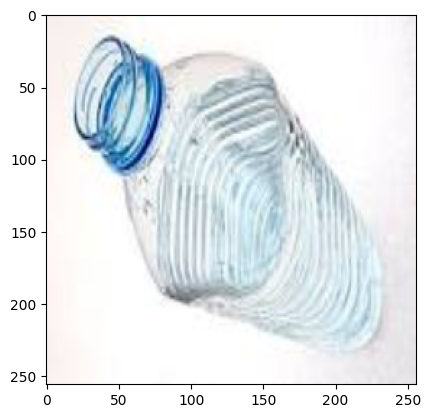

In [ ]:
predict_external_image('a.jpg')

The image resembles metal.


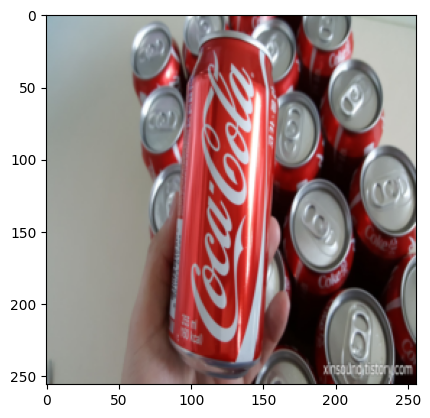

In [ ]:
predict_external_image('b.jpg')

The image resembles cardboard.


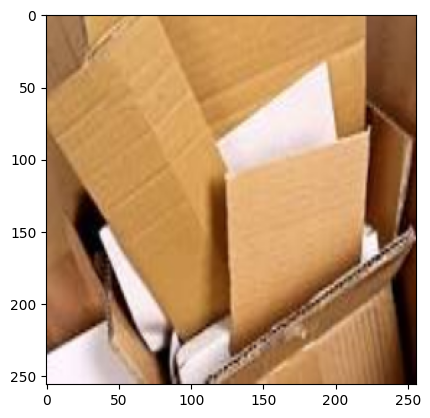

In [ ]:
predict_external_image('c.jpg')

## Summary

In this task, we used four deep learning algorithm models, MobileNetV2, DenseNet, Vgg19, and ResNet, to solve the problem of garbage image classification. MobileNetV2, DenseNet, Vgg19, and ResNet are commonly used convolutional neural network architectures in deep learning. In our experiment, we found differences in performance among these algorithms.

MobileNetV2 has lower latency and faster speed in the inference stage due to its fewer parameters and computational complexity. This makes it very suitable for real-time applications. After data preprocessing, the performance of MobileNetV2 has also significantly improved. However, although MobileNetV2 performs well in lightweight models, its accuracy may not be as good as some larger models in some complex tasks.

When testing the DenseNet model, data preprocessing showed a slight improvement in the accuracy of the model. However, DenseNet has relatively high computational complexity, especially in deep networks, as each layer is directly connected to the previous layer. Due to the need to save intermediate feature maps, DenseNet has high memory requirements, which may limit its application in some resource constrained environments.

We found that although VGG19 has a very simple architecture consisting of multiple convolutional and pooling layers, it is easy to understand and implement. We found that data preprocessing has a significant improvement on vgg19. However, VGG19 contains a large number of parameters, which results in a large model file and requires more computational resources for training and inference. In addition, VGG19 does not use skip connections like ResNet or DenseNet to better reuse low-level functions, which may reduce its efficiency in certain tasks.

The depth of ResNet enables it to capture more functionality and complexity, thus performing well in such complex tasks. We can use ResNet models pre trained on large-scale image classification tasks, and then fine tune them to adapt to specific tasks, thereby accelerating training and improving performance. And because ResNet has good robustness, the model is not sensitive to data. In the experiment, data preprocessing hardly improved its performance. However, due to the depth of ResNet, it typically has more parameters and computational complexity than some lightweight models. This makes deploying to devices with limited resources potentially challenging. In addition, due to the complexity of the model, ResNet may require more computational time and resources during the inference phase, making it unsuitable for applications with high latency requirements.

However, for garbage classification tasks that prioritize accuracy, we first excluded DenseNet and Vgg19, which had lower accuracy in this experiment. We recommend using the ResNet algorithm model when promoting this solution. Although compared to MobileNetV2 with similar accuracy, we have made slight compromises in terms of portability and efficiency. However, considering the large scale of equipment in waste treatment plants, we do not need to overly consider portability. At the same time, compared to manual classification, ResNet's efficiency is still far ahead.